In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [106]:
df = pd.read_csv('../data/Spring25_PHH3_COUNTING.csv')
df_e12 = df[df["Age"] == "E12"]
df_e16 = df[df["Age"] == "E16"]
df_p0 = df[df["Age"] == "P0"]

In [107]:
df.columns

Index(['Animal_No', 'Age', 'Cep55_Genotype', 'Slide_No', 'Position', 'L_R',
       'PH3_Cell_No', 'Yellow_Cell_No', 'Td_Cell_', 'EGFP_Cell', 'Unnamed: 10',
       'Comments'],
      dtype='object')

### Running T-tests

In [108]:
wild_type = df[df["Cep55_Genotype"] == "WT"]
het_type = df[df["Cep55_Genotype"] == "HET"]

count_wild_type = wild_type["PH3_Cell_No"] + wild_type["Yellow_Cell_No"]
count_het_type = het_type["PH3_Cell_No"] + het_type["Yellow_Cell_No"]

t_stat, p_value = stats.ttest_ind(count_wild_type, count_het_type, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -0.03220226849242668, P-value: 0.974482535850786


In [109]:
p0_wild_type = df_p0[df_p0["Cep55_Genotype"] == "WT"]["PH3_Cell_No"] + df_p0[df_p0["Cep55_Genotype"] == "WT"]["Yellow_Cell_No"]
p0_het = df_p0[df_p0["Cep55_Genotype"] == "HET"]["PH3_Cell_No"] + df_p0[df_p0["Cep55_Genotype"] == "HET"]["Yellow_Cell_No"]

t_stat, p_value = stats.ttest_ind(p0_wild_type, p0_het, equal_var=False)
print(f"T-test: t-statistic = {t_stat}, p-value = {p_value}")

T-test: t-statistic = -2.4418025488182837, p-value = 0.07853358220436502


In [110]:
e12_wild_type = df_e12[df_e12["Cep55_Genotype"] == "WT"]["PH3_Cell_No"] + df_e12[df_e12["Cep55_Genotype"] == "WT"]["Yellow_Cell_No"]
e12_het = df_e12[df_e12["Cep55_Genotype"] == "HET"]["PH3_Cell_No"] + df_e12[df_e12["Cep55_Genotype"] == "HET"]["Yellow_Cell_No"]

t_stat, p_value = stats.ttest_ind(e12_wild_type, e12_het, equal_var=False)
print(f"T-test: t-statistic = {t_stat}, p-value = {p_value}")

T-test: t-statistic = 0.8920030434319564, p-value = 0.41874917762251046


In [111]:
e16_wild_type = df_e16[df_e16["Cep55_Genotype"] == "WT"]["PH3_Cell_No"] + df_e16[df_e16["Cep55_Genotype"] == "WT"]["Yellow_Cell_No"]
e16_het = df_e16[df_e16["Cep55_Genotype"] == "HET"]["PH3_Cell_No"] + df_e16[df_e16["Cep55_Genotype"] == "HET"]["Yellow_Cell_No"]

t_stat, p_value = stats.ttest_ind(e16_wild_type, e16_het, equal_var=False)
print(f"T-test: t-statistic = {t_stat}, p-value = {p_value}")

T-test: t-statistic = -0.30550348239564246, p-value = 0.7632474856854489


### Making Graphs

In [112]:
# E12 Grouped Bar Plot 
df_e12["Yellow"] = df_e12["Yellow_Cell_No"] + df_e12["PH3_Cell_No"]
df_e12.rename(columns={"Td_Cell_":"Purple"}, inplace=True)
df_e12.rename(columns={"EGFP_Cell":"Green"}, inplace=True)

C:\Users\commo\AppData\Local\Temp\ipykernel_27004\2413683035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_e12["Yellow"] = df_e12["Yellow_Cell_No"] + df_e12["PH3_Cell_No"]
C:\Users\commo\AppData\Local\Temp\ipykernel_27004\2413683035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_e12.rename(columns={"Td_Cell_":"Purple"}, inplace=True)
C:\Users\commo\AppData\Local\Temp\ipykernel_27004\2413683035.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyda

C:\Users\commo\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(5.069444444444452, 0.5, 'PH3 Cell Count')

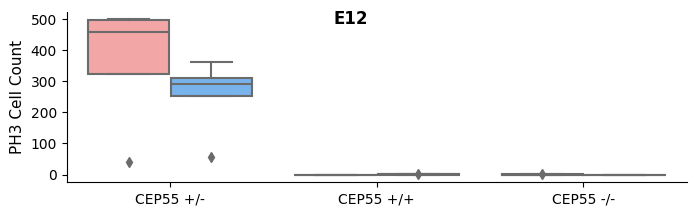

In [113]:
df_e12_melt = df_e12.melt(id_vars=["Cep55_Genotype", "Age"], value_vars=["Yellow", "Purple", "Green"], var_name="Cell_Type", value_name="Count")
df_e12_melt["Cell_Type"] = df_e12_melt["Cell_Type"].replace({"Yellow": "CEP55 +/-", "Purple": "CEP55 +/+", "Green": "CEP55 -/-"})
df_e12_melt["E12"] = df_e12_melt["Cell_Type"]

df_e12_melt.rename(columns={"Count": "PH3 Cell Count"}, inplace=True) # CHANGE THIS FOR Y VARIABLE

g = sns.catplot(x="E12", y="PH3 Cell Count", hue="Cep55_Genotype", data=df_e12_melt, kind="box", height=5, aspect=1.5, estimator=np.mean, hue_order=["WT", "HET"],
                errorbar="se", palette=["#FF9999", "#66B3FF"], legend_out=False)
fig = g.figure
fig.set_size_inches(7, 2)
g._legend.remove()
g.ax.set_yticks([0, 100, 200, 300, 400, 500])

# Set Main title
g.fig.suptitle("E12", fontsize=12, fontweight='bold')
g.set_axis_labels("", "PH3 Cell Count")
g.ax.set_ylabel("PH3 Cell Count", fontsize=11)

In [114]:
df_e16["Yellow"] = df_e16["Yellow_Cell_No"] + df_e16["PH3_Cell_No"]
df_e16.rename(columns={"Td_Cell_":"Purple"}, inplace=True)
df_e16.rename(columns={"EGFP_Cell":"Green"}, inplace=True)

C:\Users\commo\AppData\Local\Temp\ipykernel_27004\3232597398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_e16["Yellow"] = df_e16["Yellow_Cell_No"] + df_e16["PH3_Cell_No"]
C:\Users\commo\AppData\Local\Temp\ipykernel_27004\3232597398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_e16.rename(columns={"Td_Cell_":"Purple"}, inplace=True)
C:\Users\commo\AppData\Local\Temp\ipykernel_27004\3232597398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyda

C:\Users\commo\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(5.069444444444452, 0.5, 'PH3 Cell Count')

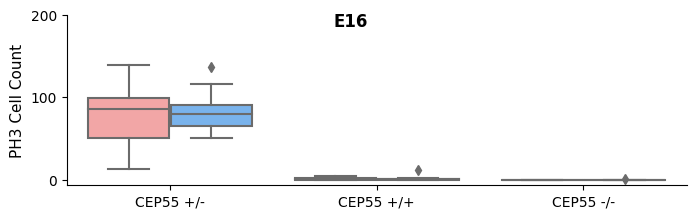

In [115]:
df_e16_melt = df_e16.melt(id_vars=["Cep55_Genotype", "Age"], value_vars=["Yellow", "Purple", "Green"], var_name="Cell_Type", value_name="Count")

df_e16_melt["Cell_Type"] = df_e16_melt["Cell_Type"].replace({"Yellow": "CEP55 +/-", "Purple": "CEP55 +/+", "Green": "CEP55 -/-"})
df_e16_melt["E16"] = df_e16_melt["Cell_Type"]

df_e16_melt.rename(columns={"Count": "PH3 Cell Count"}, inplace=True) # CHANGE THIS FOR Y VARIABLE

g = sns.catplot(x="E16", y="PH3 Cell Count", hue="Cep55_Genotype", data=df_e16_melt, kind="box", height=5, aspect=1.5, estimator=np.mean, hue_order=["WT", "HET"],
                errorbar="se", palette=["#FF9999", "#66B3FF"], legend_out=False)


fig = g.figure
fig.set_size_inches(7, 2)
g._legend.remove()
g.ax.set_yticks([0, 100, 200])

# Set Main title
g.fig.suptitle("E16", fontsize=12, fontweight='bold')
g.set_axis_labels("", "PH3 Cell Count")
g.ax.set_ylabel("PH3 Cell Count", fontsize=11)


In [116]:
df_p0["Yellow"] = df_p0["Yellow_Cell_No"] + df_p0["PH3_Cell_No"]
df_p0.rename(columns={"Td_Cell_":"Purple"}, inplace=True)
df_p0.rename(columns={"EGFP_Cell":"Green"}, inplace=True)


C:\Users\commo\AppData\Local\Temp\ipykernel_27004\3182736417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p0["Yellow"] = df_p0["Yellow_Cell_No"] + df_p0["PH3_Cell_No"]
C:\Users\commo\AppData\Local\Temp\ipykernel_27004\3182736417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p0.rename(columns={"Td_Cell_":"Purple"}, inplace=True)
C:\Users\commo\AppData\Local\Temp\ipykernel_27004\3182736417.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

C:\Users\commo\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(13.819444444444452, 0.5, 'PH3 Cell Count')

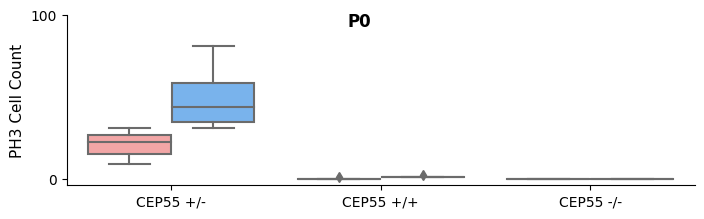

In [117]:
df_p0_melt = df_p0.melt(id_vars=["Cep55_Genotype", "Age"], value_vars=["Yellow", "Purple", "Green"], var_name="Cell_Type", value_name="Count")

df_p0_melt["Cell_Type"] = df_p0_melt["Cell_Type"].replace({"Yellow": "CEP55 +/-", "Purple": "CEP55 +/+", "Green": "CEP55 -/-"})
df_p0_melt["P0"] = df_p0_melt["Cell_Type"]

df_p0_melt.rename(columns={"Count": "PH3 Cell Count"}, inplace=True) # CHANGE THIS FOR Y VARIABLE

g = sns.catplot(x="P0", y="PH3 Cell Count", hue="Cep55_Genotype", data=df_p0_melt, kind="box", height=5, aspect=1.5, estimator=np.mean, hue_order=["WT", "HET"],
                errorbar="se", palette=["#FF9999", "#66B3FF"], legend_out=False)

fig = g.figure
fig.set_size_inches(7, 2)
g._legend.remove()
g.ax.set_yticks([0, 100])

# Set Main title
g.fig.suptitle("P0", fontsize=12, fontweight='bold')
g.set_axis_labels("", "PH3 Cell Count")
g.ax.set_ylabel("PH3 Cell Count", fontsize=11)

### Making Graphs Pt.2

In [128]:
df_m = df.melt(id_vars=["Cep55_Genotype", "Age"], value_vars=["PH3_Cell_No","Yellow_Cell_No", "Td_Cell_", "EGFP_Cell"], var_name="Cell_Type", value_name="Count")
df_m["Cell_Type"] = df_m["Cell_Type"].replace({"PH3_Cell_No":"CEP55 +/-", "Yellow_Cell_No": "CEP55 +/-", "Td_Cell_": "CEP55 +/+", "EGFP_Cell": "CEP55 -/-"})


C:\Users\commo\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(9.444444444444452, 0.5, 'PH3 Cell Count')

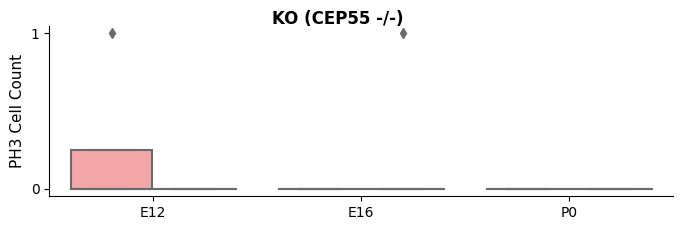

In [162]:
g = sns.catplot(x="Age", y="Count", hue="Cep55_Genotype", data=df_m[df_m["Cell_Type"] == "CEP55 -/-"], kind="box", height=5, aspect=1.5, estimator=np.mean, hue_order=["WT", "HET"],
                errorbar="se", palette=["#FF9999", "#66B3FF"], legend_out=False)

fig = g.figure
fig.set_size_inches(7, 2)
g.ax.set_yticks([0, 1])
g._legend.remove()

# Set Main title
fig.suptitle("KO (CEP55 -/-)", fontsize=12, fontweight='bold', y=1.05)
g.set_axis_labels("", "PH3 Cell Count")
g.ax.set_ylabel("PH3 Cell Count", fontsize=11)

C:\Users\commo\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(13.819444444444452, 0.5, 'PH3 Cell Count')

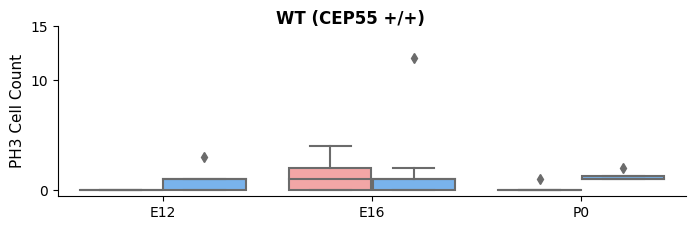

In [169]:
g = sns.catplot(x="Age", y="Count", hue="Cep55_Genotype", data=df_m[df_m["Cell_Type"] == "CEP55 +/+"], kind="box", height=5, aspect=1.5, estimator=np.mean, hue_order=["WT", "HET"],
                errorbar="se", palette=["#FF9999", "#66B3FF"], legend_out=False)

fig = g.figure
fig.set_size_inches(7, 2)
g.ax.set_yticks([0, 10, 15])
g._legend.remove()

# Set Main title
fig.suptitle("WT (CEP55 +/+)", fontsize=12, fontweight='bold', y=1.05)
g.set_axis_labels("", "PH3 Cell Count")
g.ax.set_ylabel("PH3 Cell Count", fontsize=11)

C:\Users\commo\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(5.069444444444452, 0.5, 'PH3 Cell Count')

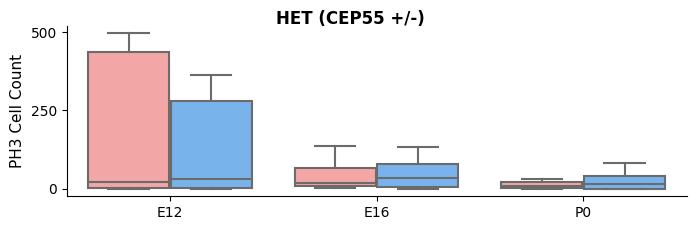

In [ ]:
g = sns.catplot(x="Age", y="Count", hue="Cep55_Genotype", data=df_m[df_m["Cell_Type"] == "CEP55 +/-"], kind="box", height=5, aspect=1.5, estimator=np.mean, hue_order=["WT", "HET"],
                errorbar="se", palette=["#FF9999", "#66B3FF"], legend_out=False)

fig = g.figure
fig.set_size_inches(7, 2)
g._legend.remove()
g.ax.set_yticks([0, 125, 250, 375, 500])

# Set Main title
fig.suptitle("HET (CEP55 +/-)", fontsize=12, fontweight='bold', y=1.05)
g.set_axis_labels("", "PH3 Cell Count")
g.ax.set_ylabel("PH3 Cell Count", fontsize=11)